In [1]:
#All code present was constructed by and is the explicit property of Kerry Hall. 
#Problems and datasets sourced from "Probability and Statistics for Engineers and Scientists" by Walpole, Myers, Myers, and Ye, 9th ed.
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import stemgraphic
from matplotlib_venn import venn3

Problem set: 1.6, 1.12, 1.18, 1.30, 2.4, 2.8, 2.30, 2.54, 2.84, 2.92

1.6: The tensile strength of silicone rubber is thought to be a function of curing temperature. A study was carried out in which samples of 12 specimens of the rubber were prepared using temperatures of 20C and 45C. The data below shows the tensile strength in MPa.

In [2]:
temperature_data_dict = { 'T20C' : [
    2.07, 2.14, 2.22, 2.03, 2.21, 2.03,
    2.05, 2.18, 2.09, 2.14, 2.11, 2.02,
                                   ],
                          'T40C' : [
    2.52, 2.15, 2.49, 2.03, 2.37, 2.05,
    1.99, 2.42, 2.08, 2.42, 2.29, 2.01,
                                   ],}

Text(0, 0.5, 'Tensile Strength[MPa]')

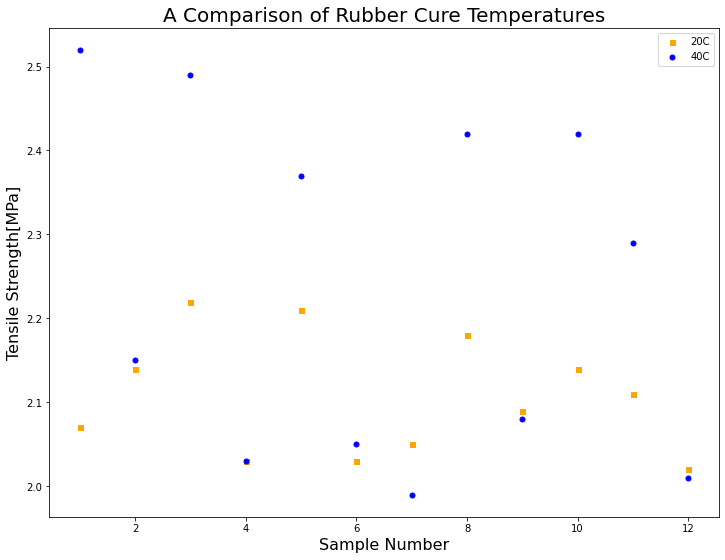

In [3]:
#1.6a
fig, ax = plt.subplots(figsize=(12,9),)
ax.scatter(range(1,13),temperature_data_dict.get('T20C'), s=25, c='orange', marker='s', label='20C')
ax.scatter(range(1,13),temperature_data_dict.get('T40C'), s=25, c='blue', marker='o', label='40C')
ax.legend(['20C','40C'],)
plt.title("A Comparison of Rubber Cure Temperatures", fontsize=20)
ax.set_xlabel("Sample Number", fontsize=16)
ax.set_ylabel("Tensile Strength[MPa]", fontsize=16)

In [4]:
#1.6b
print("The average strength when cured at 40C is: " + str(np.average(temperature_data_dict.get('T40C'))))  
print("The average strength when cured at 20C is: " + str(np.average(temperature_data_dict.get('T20C'))))

The average strength when cured at 40C is: 2.235
The average strength when cured at 20C is: 2.1075


1.6c Based on the averages, the increase in temperature did increase the tensile strength. I would not really want to make assumptions based on the dataset. There is too much variability in the warmer set.  1.6d As previously mentioned, the variance has greatly increased.

1.12: For exercise 1.6, compute the sample standard deviation in tensile strength for the samples separately for the two temperatures. Does it appear as if an increase in temperature influences variability in tensile strength?

In [5]:
print("The standard deviation when cured at 40C is: " + str(np.std(temperature_data_dict.get('T40C'))))  
print("The standard deviation when cured at 20C is: " + str(np.std(temperature_data_dict.get('T20C'))))

The standard deviation when cured at 40C is: 0.19452934654356574
The standard deviation when cured at 20C is: 0.06783865662978113


1.18: The following scores represent the final examination grades for an elementary statistics course:

In [6]:
final_exam_grades = [
    23, 60, 79, 32, 57, 74, 52, 70, 82,
    36, 80, 77, 81, 95, 41, 65, 92, 85,
    55, 76, 52, 10, 64, 75, 78, 25, 80,
    98, 81, 67, 41, 71, 83, 54, 64, 72,
    88, 62, 74, 43, 60, 78, 89, 76, 84,
    48, 84, 90, 15, 79, 34, 67, 17, 82,
    69, 74, 63, 80, 85, 61,
                    ]

The grade data median is: 71.5. It is also visualized in the figure below at the slightly darker area on row 7.


Text(0.5, 1.0, 'Score Stem and Leaf Plot')

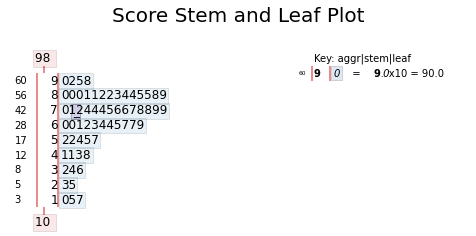

In [7]:
#1.18a
#This thing behaves wierd. It was splitting lines before I added the break_on param. 
#I get why what I did fixes it but whoever wrote it doesn't seem to have thought about it.
print("The grade data median is: " + str(np.median(final_exam_grades))+". It is also visualized in the figure below at the slightly darker area on row 7.")
fig, ax = stemgraphic.stem_graphic(final_exam_grades, break_on=20,) 
plt.title("Score Stem and Leaf Plot", fontsize=20)

Text(0.5, 1.0, 'Relative Score Frequency')

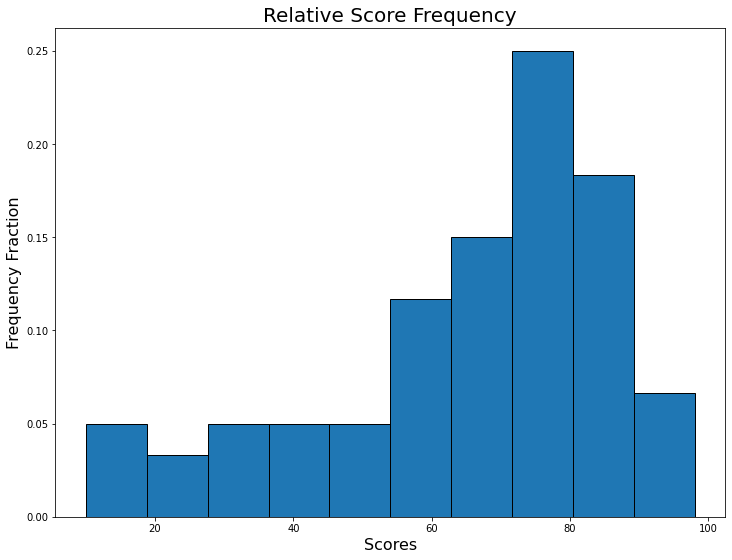

In [8]:
#1.18b
fig, ax = plt.subplots(figsize=(12,9))
ax.hist(final_exam_grades, edgecolor='black', weights=np.ones_like(final_exam_grades) / len(final_exam_grades))
ax.set_ylabel("Frequency Fraction",fontsize=16)
ax.set_xlabel("Scores",fontsize=16)
plt.title("Relative Score Frequency",fontsize=20)

The skew in the above data is pretty obvious. It does not resemble a normal distribution and is heavily skewed toward the higher end of the grade scale. It also closely resembles the stem and leaf chart.

In [9]:
#1.18c
print("The exam median grade is: "+str(np.percentile(final_exam_grades, 50, axis=0)))
print("The exam mean grade is: "+str(np.average(final_exam_grades)))
print("The standard deviation of the grades is: "+str(np.std(final_exam_grades)))

The exam median grade is: 71.5
The exam mean grade is: 65.48333333333333
The standard deviation of the grades is: 20.95669476696064


1.30: Below are the lifetimes, in hours, of fifty 40W 110V internally frosted incandescent lamps, taken from forced life tests:

In [10]:
discrete_life_data_set = [
    919, 1196, 785, 1126, 936, 918,
    1156, 920, 948, 1067, 1092, 1162,
    1170, 929, 950, 905, 972, 1035,
    1045, 855, 1195, 1195, 1340, 1122, 
    938, 970, 1237, 956, 1102, 1157,
    978, 832, 1009, 1157, 1151, 1009,
    765, 958, 902, 1022, 1333, 811,
    1217, 1085, 896, 958, 1311, 1037, 
    702, 923,
                          ] # UNITS OF HOURS
quartile1, medians, quartile3 = np.percentile(discrete_life_data_set, [25, 50, 75], axis=0)

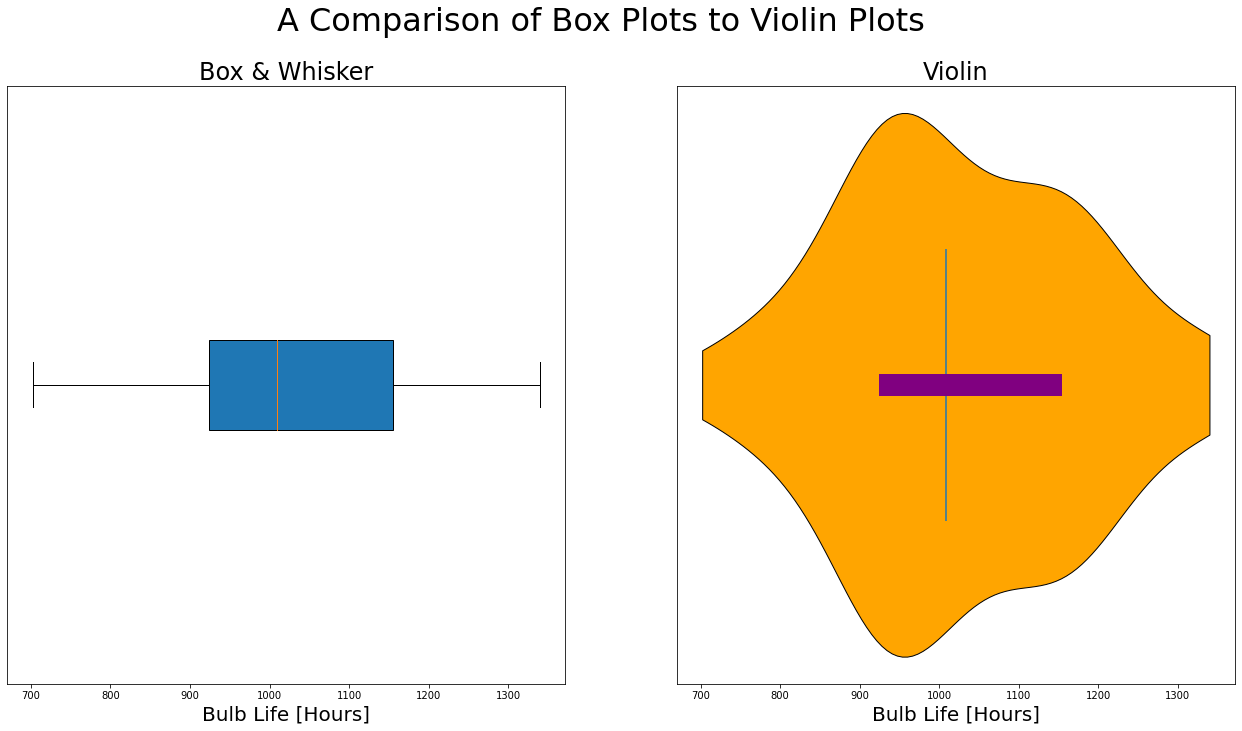

In [11]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(22,11))

box_plot = ax1.boxplot(discrete_life_data_set, 
                       vert=False,
                       patch_artist=True)

violin_plot = ax2.violinplot(discrete_life_data_set, 
                             vert=False,
                             showmedians=True,
                             showextrema=False,
                             )
for member in violin_plot['bodies']:
    member.set_facecolor('#FFA500')
    member.set_edgecolor('black')
    member.set_alpha(1)
    
fig.suptitle("A Comparison of Box Plots to Violin Plots", fontsize=32)
ax1.set_xlabel("Bulb Life [Hours]", fontsize=20)
ax2.set_xlabel("Bulb Life [Hours]", fontsize=20)
ax1.set_title("Box & Whisker", fontsize=24)
ax2.set_title("Violin", fontsize=24)

ax1.tick_params(left = False, right = False, labelleft = False,
                labelbottom = True, bottom = True)
ax2.tick_params(left = False, right = False, labelleft = False,
                labelbottom = True, bottom = True)

ax2.hlines(1, quartile1, quartile3, color='#800080', linestyle='-', lw=22)

The above graph constructed in JMP:

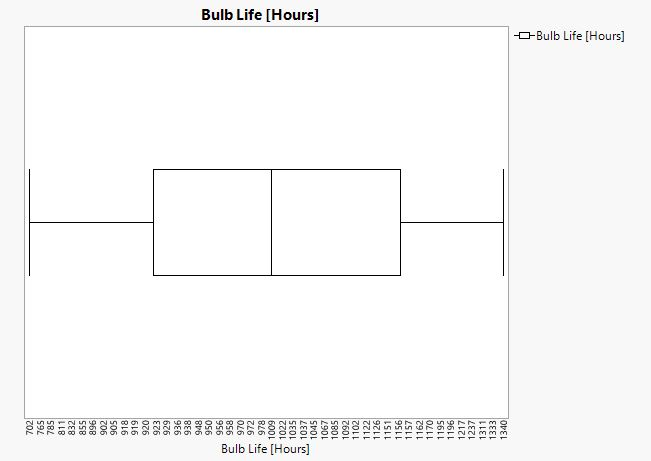

2.4: An experiment involves tossing a pair of dice, one green and one red, and recording the numbers that come up. If x equals the outcome on the green die and y the outcome on the red die, describe the sample space S (a) by listing the elements (x,y); (b) by using the rule method.

In [12]:
# I believe this is an extremely elegant solution to 2.4a
combination_storage_container = [] # doing this because it will be useful later, can access by index
print("The Combination Array:")
for i in range(1,7):
    
    out = "(" + str(i) + ", " # making the initial string form
    if i !=1: print("\n")
    
    for j in range(1,7):
        
        out += (str(j) + ")") # adding the final piece
        print(out, end=" , ") # printing the piece 
        out = out[:4] # chopping off the final piece I just added by slicing to 4th position
        combination_storage_container.append(tuple([i,j]))
        
print("\n\n\n",combination_storage_container)

The Combination Array:
(1, 1) , (1, 2) , (1, 3) , (1, 4) , (1, 5) , (1, 6) , 

(2, 1) , (2, 2) , (2, 3) , (2, 4) , (2, 5) , (2, 6) , 

(3, 1) , (3, 2) , (3, 3) , (3, 4) , (3, 5) , (3, 6) , 

(4, 1) , (4, 2) , (4, 3) , (4, 4) , (4, 5) , (4, 6) , 

(5, 1) , (5, 2) , (5, 3) , (5, 4) , (5, 5) , (5, 6) , 

(6, 1) , (6, 2) , (6, 3) , (6, 4) , (6, 5) , (6, 6) , 


 [(1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)]


2.4b: S = { (x,y) | (0 < x <= 6)  &  (0 < y <= 6) }

2.8: For the sample space of Exercise 2.4 (the previously defined list of tuples named "combination_storage_container"), (a) list the elements corresponding to the event A that the sum is greater than 8; (b) list the elements corresponding to the event B that a 2 occurs on either die; (c) list the elements corresponding to the event C that a number greater than 4 comes up on the green die; (d) list the elements corresponding to the intersection of A & C; (e) list the elements corresponding to the intersecton of A & B; (f) list the elements corresponding to the intersection of B & C; (g) construct a Venn diagram to illustrate the intersections and unions of the events A, B, and C. 

The A space is:
 [(3, 6), (4, 5), (4, 6), (5, 4), (5, 5), (5, 6), (6, 3), (6, 4), (6, 5), (6, 6)] 

The B space is:
 [(1, 2), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (3, 2), (4, 2), (5, 2), (6, 2)] 

The C space is:
 [(5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6)] 

The AB intersection space is:
 [] 

The AC intersection space is:
 [(5, 4), (5, 5), (5, 6), (6, 3), (6, 4), (6, 5), (6, 6)] 

The BC intersection space is:
 [(5, 2), (6, 2)] 



Text(0.5, 1.0, 'Venn Diagram of A, B, & C Spaces')

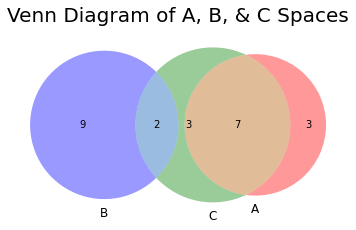

In [13]:
# IF I was making this a permanent piece of code, I would incorporate this into the above for loop but this is not that much for a Jupyter notebook.
A_space = []
B_space = []
C_space = []
C_A_intersection = []
B_A_intersection = []
C_B_intersection = []
for combo in combination_storage_container:
    if combo[0] + combo[1] > 8: # <------ sum condition
        A_space.append(combo)
    if combo[0] == 2 or combo[1] == 2: # 2 condition
        B_space.append(combo)
    if combo[0] > 4: #<-------------- green bigger than 4 condition
        C_space.append(combo)
for combo in A_space:
    if combo in B_space:
        B_A_intersection.append(combo)
    if combo in C_space:
        C_A_intersection.append(combo)
for combo in B_space:
    if combo in C_space:
        C_B_intersection.append(combo)
print("The A space is:\n", A_space, "\n")
print("The B space is:\n", B_space, "\n")
print("The C space is:\n", C_space, "\n")
print("The AB intersection space is:\n", B_A_intersection, "\n")
print("The AC intersection space is:\n", C_A_intersection, "\n")
print("The BC intersection space is:\n", C_B_intersection, "\n")

v = venn3([set(A_space), set(C_space), set(B_space),], ('A', 'C', 'B',))
plt.title("Venn Diagram of A, B, & C Spaces", fontsize=20)

As a note, the above diagram is formatted a bit wierdly because the intersection of A and B is null but the other two intersections take up significant fractions of C Space. This causes the 3 that corresponds to the C space exclusive of A & B space to look like it is in AC intersection space

2.30: In how many different ways can a true-false test consisting of 9 questions be answered?

In [14]:
possible_order_dependent_outcomes = 2 ** 9
print("There are", possible_order_dependent_outcomes, "possible order dependent outcomes.")

There are 512 possible order dependent outcomes.


2.54: From past experience, a stockbroker believes that under present economic conditions a customer will invest in tax-free bonds with a probability of 0.6, will invest in mutual funds with a probability of 0.3, and will invest in both with a probability of 0.15. At this time, find the probability that a customer will invest (a) in either tax-free or mutual funds; (b) in neither tax-free bonds nor mutual funds.

In [15]:
either = 0.6 + 0.4*0.3
neither = 1 - (either + 0.15)
print("The chance of buying either (not both) is:", str(100*either) + "%.")
print("The chance of buying nothing is:", str(100*neither) + "%.")

The chance of buying either (not both) is: 72.0%.
The chance of buying nothing is: 13.0%.


2.84: The probability that you are home when a telemarketing company calls is 0.4. Given that you are home, the probability that goods will be bought from the company is 0.3. Find the probability that you are home and goods are bought from the company. 

In [16]:
probability_that_i_am_home_and_buying = 0.3*0.4
print("The probability that I am home and buying is:", str(100*probability_that_i_am_home_and_buying) + "%.")

The probability that I am home and buying is: 12.0%.


2.92: Suppose the diagram of an electrical system is as given in Figure 2.10. What is the probability that the system works? Assume the components fail independently.

In [17]:
probability_if_every_piece_is_essential = 0.95*0.9*0.8*0.7
print("The probability that the system works if every piece is required is:", str(probability_if_every_piece_is_essential) + ".")
probability_if_c_or_b_can_fail = np.round(0.95*0.9*(0.8+0.2*0.7), 4) # had to round here because the float was giving garbage memory making number stupidly long.
print("The probability that the system works if only c or b is required is:", str(probability_if_c_or_b_can_fail) + ".")

The probability that the system works if every piece is required is: 0.4788.
The probability that the system works if only c or b is required is: 0.8037.
